In [36]:
import numpy as np
import pandas as pd
print("Pandas и NumPy работают!")

Pandas и NumPy работают!


In [37]:
import os
print(os.getcwd())

C:\Users\admin\AppData\Roaming\Python\Python311\Scripts


In [38]:
#Разведка данных и исправление типов данных

In [39]:
# Загружаем CSV-файл в DataFrame.
# По умолчанию Pandas использует кодировку UTF-8, но при чтении возникла ошибка UnicodeDecodeError.
# Это означает, что в файле есть символы, не поддерживаемые UTF-8.
# Мы изменили кодировку на "ISO-8859-1", которая поддерживает европейские языки и решает проблему.
# Также установили параметр low_memory=False, чтобы Pandas не загружал данные частями, избегая ошибок с типами.
df = pd.read_csv("superstore_final_dataset (1).csv", encoding="ISO-8859-1", low_memory=False)

# Выводим первые 5 строк, чтобы проверить корректность загрузки.
print(df.head())

# Данные загружены, но есть несоответствие типов (например, даты представлены как строки).
# Следующим шагом будем приводить данные к правильным типам.

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

In [40]:
# Убираем возможные лишние пробелы в названиях колонок
df.columns = df.columns.str.strip()

# Преобразуем даты в формат datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"], dayfirst=True, errors='coerce')
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], dayfirst=True, errors='coerce')

# Преобразуем почтовый индекс в int, предварительно удалив `.0`, если оно есть
df["Postal_Code"] = df["Postal_Code"].astype(str)  # Сначала делаем строки
df["Postal_Code"] = df["Postal_Code"].str.replace(".0", "", regex=False)  # Убираем .0
df["Postal_Code"] = pd.to_numeric(df["Postal_Code"], errors="coerce").astype("Int64")  # Преобразуем в Int64


# Выводим итоговые типы данных
print(df.dtypes)

# Проверяем, как выглядят преобразованные данные
print(df.head())

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               Int64
Region                   object
Product_ID               object
Category                 object
Sub_Category             object
Product_Name             object
Sales                   float64
dtype: object
   Row_ID        Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2

In [41]:
# Используем df.info() для получения общей информации о DataFrame:
# Это покажет нам количество строк и столбцов, типы данных в каждом столбце,
# а также количество ненулевых значений в каждом столбце.
# Это поможет выявить пропущенные значения и проблемы с типами данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   Int64         
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

In [42]:
# Используем df.isnull().sum() для подсчета пропущенных значений в каждом столбце.
# Это поможет нам понять, в каких столбцах могут быть пропущенные значения,
# чтобы потом решить, как с ними работать (удалить или заполнить).
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [43]:
# Удаляем строки, где есть пропуски в столбце Postal_Code
# Причина: Почтовые коды являются уникальными для каждой локации и не могут быть заменены средним значением, так как это будет нелогично.
# Если бы мы заменили пропуски на средние значения, это нарушило бы целостность данных, так как почтовые коды должны быть точными.
# Мы можем безопасно удалить эти строки, так как общее количество строк в датафрейме — 9800, а пропущены данные только в 11 строках.
df_cleaned = df.dropna(subset=['Postal_Code'])

# Проверяем, что пропуски были удалены
df_cleaned.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64

In [44]:
# Используем df.describe() для получения статистического описания числовых данных.
# Это включает такие метрики, как среднее, стандартное отклонение, минимальные и максимальные значения,
# а также квартели для каждого числового столбца.
# Однако, столбцы Row_ID и Postal_Code не имеют практического смысла для статистического описания,
# так как Row_ID — это уникальный идентификатор, а Postal_Code — код региона, и их значения не имеют
# значения для вычисления среднего, квартелей и других статистических характеристик.
# Поэтому, чтобы избежать искажения данных, эти столбцы будут исключены из анализа.
df_cleaned.drop(columns=["Row_ID", "Postal_Code"]).describe()

,Order_Date,Ship_Date,Sales
count,9789,9789,9789.000000
mean,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,230.116193
min,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2016-05-23 00:00:00,2016-05-27 00:00:00,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,54.384000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,210.392000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,NaN,NaN,625.302079


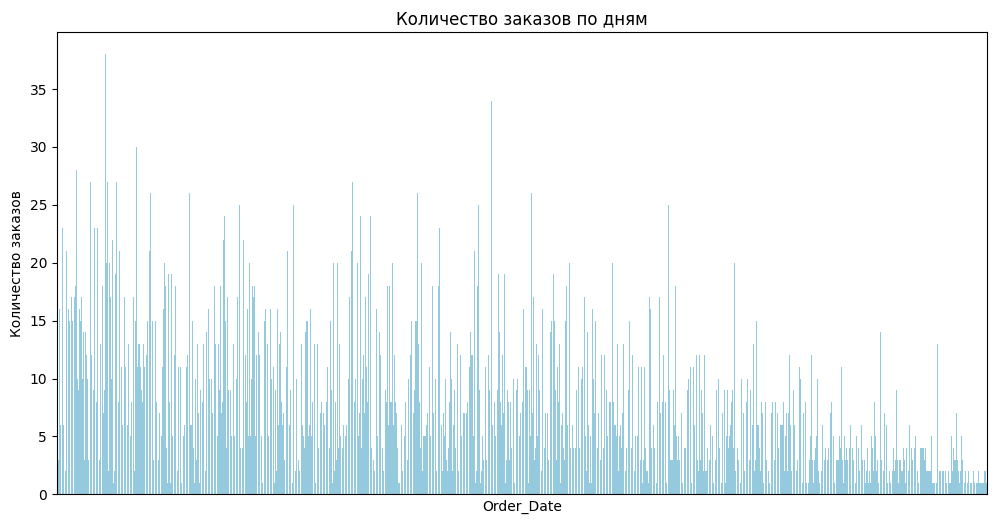

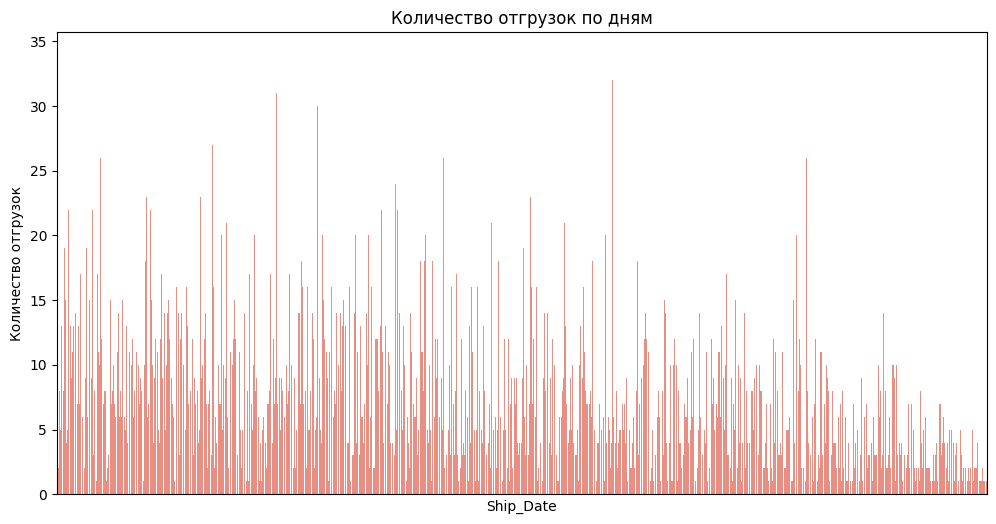

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что дата в нужном формате, используя .loc для корректной работы с данным DataFrame
df_cleaned.loc[:, 'Order_Date'] = pd.to_datetime(df_cleaned['Order_Date'])
df_cleaned.loc[:, 'Ship_Date'] = pd.to_datetime(df_cleaned['Ship_Date'])

# График по заказам (Order_Date)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Order_Date', color='skyblue')
plt.title('Количество заказов по дням')
plt.ylabel('Количество заказов')  # Подпишем ось Y
plt.xticks([])  # Убираем подписи на оси X
plt.show()

# График по отгрузкам (Ship_Date)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Ship_Date', color='salmon')
plt.title('Количество отгрузок по дням')
plt.ylabel('Количество отгрузок')  # Подпишем ось Y
plt.xticks([])  # Убираем подписи на оси X
plt.show()

In [46]:
#График по заказам: Максимальное количество заказов в день — около 40. Есть дни с нулевыми заказами, что указывает на выходные дни. Аномалий не выявлено.
#График по отгрузкам: Максимальное количество отгрузок в день — меньше 35. Также есть дни с нулевыми отгрузками, что также связано с выходными днями. Аномалий не выявлено.

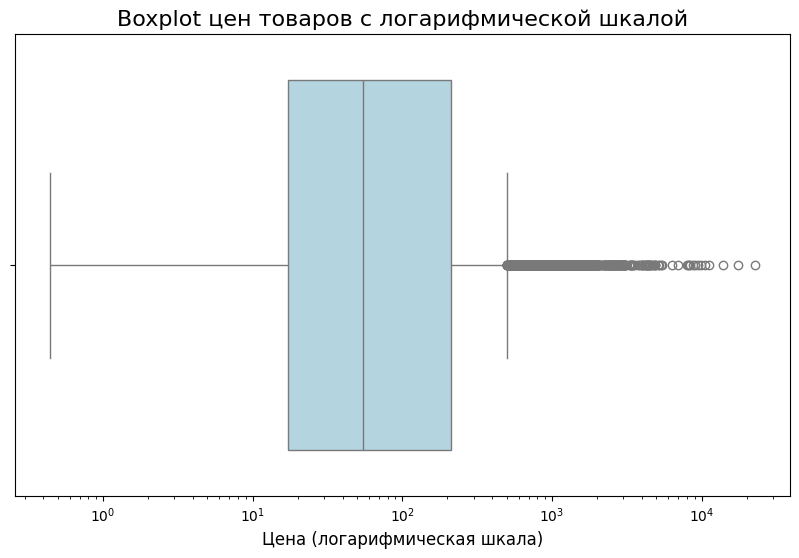

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Sales'], color='lightblue')

plt.xscale('log')  # Логарифмическая шкала
plt.title("Boxplot цен товаров с логарифмической шкалой", fontsize=16)
plt.xlabel("Цена (логарифмическая шкала)", fontsize=12)
plt.show()

In [48]:
# График цен мы проверим отдельно, в SQL, просмотрев 10 самых дорогих товаров.  
# Затем сравним их цены с реальными значениями в интернете.  
# Однако сам график, судя по форме, следует нормальному распределению   
# Выбросы мы дополнительно проверим, но логично, что очень дорогие товары  
# заказывают реже, и это, вероятно, укладывается в картину мира.

In [51]:
#Экспортируем данные – сохраняем df_cleaned в формате CSV
#Используем кодировку utf-8, Сохраняем файл и загружаем в MySQL
df_cleaned.loc[:, 'Product_Name'] = df_cleaned['Product_Name'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_cleaned.to_csv("cleaned_data.csv", index=False, encoding="utf-8-sig")

In [52]:
#проверим файл
import pandas as pd
pd.read_csv("cleaned_data.csv").head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
